# Import libraries & load data

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv("student-scores.csv")

# Inspect data

In [46]:
df.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,avg_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,NaN,27,Lawyer,73,81,93,97,63,80,87,82.000000
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,NaN,47,Doctor,90,86,96,100,90,88,90,91.428571
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,NaN,13,Government Officer,81,97,95,96,65,77,94,86.428571
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,NaN,3,Artist,71,74,88,80,89,63,86,78.714286
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,NaN,10,Unknown,84,77,65,65,80,74,76,74.428571


In [45]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2000 non-null   int64  
 1   first_name                  2000 non-null   object 
 2   last_name                   2000 non-null   object 
 3   email                       2000 non-null   object 
 4   gender                      2000 non-null   object 
 5   part_time_job               2000 non-null   bool   
 6   absence_days                2000 non-null   int64  
 7   extracurricular_activities  0 non-null      float64
 8   weekly_self_study_hours     2000 non-null   int64  
 9   career_aspiration           2000 non-null   object 
 10  math_score                  2000 non-null   int64  
 11  history_score               2000 non-null   int64  
 12  physics_score               2000 non-null   int64  
 13  chemistry_score             2000 

,id,absence_days,extracurricular_activities,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,avg_score
count,2000.000000,2000.000000,0.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,3.665500,NaN,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000,80.980357
std,577.494589,2.629271,NaN,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705,6.042224
min,1.000000,0.000000,NaN,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000,59.142857
25%,500.750000,2.000000,NaN,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000,77.285714
50%,1000.500000,3.000000,NaN,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000,81.000000
75%,1500.250000,5.000000,NaN,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000,84.714286
max,2000.000000,10.000000,NaN,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000,96.142857


# Define x and y

In [44]:
score = ['math_score', 'history_score', 'physics_score', 'chemistry_score', 'biology_score', 'english_score', 'geography_score']

df['avg_score'] = df[score].mean(axis=1)

In [43]:
print(df['avg_score'])

0       82.000000
1       91.428571
2       86.428571
3       78.714286
4       74.428571
          ...    
1995    79.714286
1996    76.285714
1997    82.571429
1998    80.857143
1999    88.142857
Name: avg_score, Length: 2000, dtype: float64


In [42]:
X = df[['weekly_self_study_hours', 'absence_days']].copy()
y = df['avg_score']

In [41]:
X.head(), y.head()

(   weekly_self_study_hours  absence_days
 0                       27             3
 1                       47             2
 2                       13             9
 3                        3             5
 4                       10             5,
 0    82.000000
 1    91.428571
 2    86.428571
 3    78.714286
 4    74.428571
 Name: avg_score, dtype: float64)

# Check for missing values

In [40]:
df.isna().sum()

id                               0
first_name                       0
last_name                        0
email                            0
gender                           0
part_time_job                    0
absence_days                     0
extracurricular_activities    2000
weekly_self_study_hours          0
career_aspiration                0
math_score                       0
history_score                    0
physics_score                    0
chemistry_score                  0
biology_score                    0
english_score                    0
geography_score                  0
avg_score                        0
dtype: int64

# Splitting data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Model training (linear regression)

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# Predictions

In [49]:
y_pred = model.predict(X_test)
y_pred[:5]

array([81.89743801, 76.90891477, 80.79323268, 77.22185319, 77.34517942])

# Evaluate model

In [50]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [51]:
print("Mean absolute error :", mae)

Mean absolute error : 4.437957859592938


In [52]:
print("r^2 score :", r2)

r^2 score : 0.2645441318161772


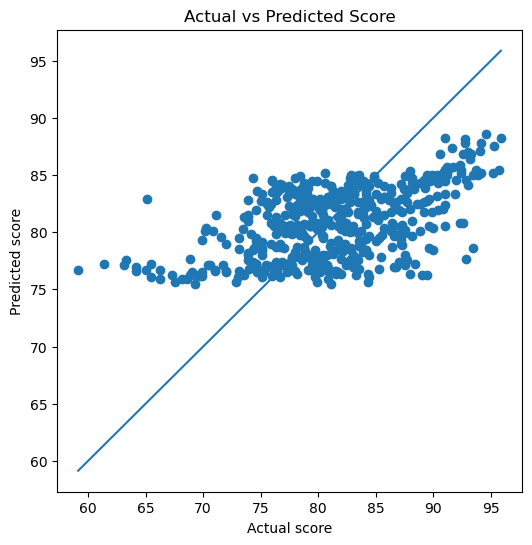

In [53]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual score")
plt.ylabel("Predicted score")
plt.title("Actual vs Predicted Score")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.show()

In [54]:
from sklearn.metrics import accuracy_score